
1. Importamos las bibliotecas requeridas para el EDA
A continuación se muestran las librerías que se utilizan para realizar el EDA (Análisis Exploratorio de Datos).

In [45]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import scipy
import statsmodels.api as sm
from datetime import datetime
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

2. Cargamos los archivos excel y lo convertimos en dataframe, para que podamos realizar el analisis en pandas y demás librerías

In [2]:
# Ruta del archivo Excel
ruta_archivo = 'datasets/homicidios.xlsx'

# Leer el archivo Excel
Homicidios = pd.read_excel(ruta_archivo, sheet_name='HECHOS', dtype={'Altura': str}, engine='openpyxl')

# Leer el otro archivo Excel
Victimas = pd.read_excel(ruta_archivo, sheet_name='VICTIMAS', engine='openpyxl')

In [3]:
# Verificamos las 5 primeras filas 
Homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
# Verificamos las 5 últimas filas 
Homicidios.tail()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


3. Verificación de los tipos de datos

Aquí verificamos los tipos de datos, ya que en algunos casos se pueden almacenar como una cadena de texto, cuando en realidad es 
entero o flotante, por lo que haremos la conversión pero mas adelante.

In [5]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    object        
 12  Cruce                  525 non-null    object        
 13  Direc

4. Eliminación de columnas irrelevantes
   
Este paso es ciertamente necesario en cada EDA porque a veces habrá muchas columnas que nunca usamos y en tales casos eliminarlas es la única solución.

In [6]:
# Combinamos las columnas altura y cruce en la columna altura
Homicidios['Altura'] = Homicidios['Altura'].fillna(Homicidios['Cruce'])

In [7]:
# Elimino las columnas que no son necesarias para el analisis
Homicidios = Homicidios.drop(['HORA', 'Dirección Normalizada', 'XY (CABA)', 'PARTICIPANTES', 'Cruce'], axis=1)

In [8]:
Homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-58.50877521,-34.66977709,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034,1,-58.39040293,-34.63189362,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-58.38718297,-34.62246630,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,MOM,7,-58.43353773,-34.64561636,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-58.46739825,-34.65117757,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,TERRADA,11,-58.47293407,-34.61984745,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071,9,-58.47066794,-34.65021673,AUTO,CARGAS


5. Conversión de los datos.

Hacemos una pequena verificación de los datos, luego evaluamos que columnas no tienen el tipo de dato adecuado

In [9]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HH               696 non-null    object        
 7   LUGAR_DEL_HECHO  696 non-null    object        
 8   TIPO_DE_CALLE    696 non-null    object        
 9   Calle            695 non-null    object        
 10  Altura           654 non-null    object        
 11  COMUNA           696 non-null    int64         
 12  pos x            696 non-null    object        
 13  pos y            696 non-null    object        
 14  VICTIMA          696 non-null    object   

* Verificamos la columna 'HH' a pesar de tener numeros enteros nos aparece como object.

In [10]:
# Observamos la cantidad de valores únicos y que valores únicos contiene dicha columna.
print(Homicidios['HH'].nunique())
print(Homicidios['HH'].unique())

25
[4 1 7 0 5 18 19 15 11 22 16 9 23 6 10 17 12 8 20 21 14 3 2 13 'SD']


In [11]:
# Analizamos el valor 'SD' en la columana 'HH'
Homicidios[Homicidios['HH'] == 'SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",GRIVEO,11,-58.52169422,-34.59471640,MOTO,MOTO


In [12]:
# Solo observamos un dato que tiene 'SD', por lo que , se va imputar la moda de las horas.
int(pd.to_numeric(Homicidios['HH'], errors='coerce').mode())
# Reemplazar 'SD' por 7 en la columna 'HH'
Homicidios['HH'] = Homicidios['HH'].replace('SD', 7)
# Convertir toda la columna 'HH' a enteros
Homicidios['HH'] = Homicidios['HH'].astype(int)


C:\Users\Paola\AppData\Local\Temp\ipykernel_10428\2433901623.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(pd.to_numeric(Homicidios['HH'], errors='coerce').mode())


* Verificamos las columnas 'pos x' y 'pos y'

In [13]:
# Observamos que los valores que no tienen datos estan representados por '.' en la dichas columnas
Homicidios[(Homicidios['pos x'] == '.')]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,COMUNA,pos x,pos y,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,.,.,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,.,.,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20,SD,CALLE,NaN,NaN,0,.,.,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,0,.,.,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NaN,14,.,.,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,.,.,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,.,.,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,4,.,.,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,.,.,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,.,.,MOTO,OBJETO FIJO


In [14]:
# Entonces imputamos los valores vacíos de 'pos x' y 'pos y', mediante las coordenadas que nos de googles maps y donde no se sepa el lugar del hecho
# se colocará 0 y 0

Homicidios.loc[38, 'pos x'] = -58.438556200262106
Homicidios.loc[38, 'pos y'] = -34.54834237826577
Homicidios.loc[106, 'pos x'] = -58.18077826225132
Homicidios.loc[106, 'pos y'] = -34.76080441813097
Homicidios.loc[119, 'pos x'] = 0.0
Homicidios.loc[119, 'pos y'] = 0.0
Homicidios.loc[139, 'pos x'] = -58.420316546916574
Homicidios.loc[139, 'pos y'] = -34.62811567483009
Homicidios.loc[176, 'pos x'] = -58.43858509109955
Homicidios.loc[176, 'pos y'] = -34.54838117875584
Homicidios.loc[180, 'pos x'] = -58.492524275751414
Homicidios.loc[180, 'pos y'] = -34.64054387619115
Homicidios.loc[181, 'pos x'] = -58.47558886225683
Homicidios.loc[181, 'pos y'] = -34.66919180542672
Homicidios.loc[256, 'pos x'] = -58.379038504587925
Homicidios.loc[256, 'pos y'] = -34.6278655330336
Homicidios.loc[313, 'pos x'] = -58.438531446921274
Homicidios.loc[313, 'pos y'] = -34.54845187296631
Homicidios.loc[546, 'pos x'] = -58.440054941584314
Homicidios.loc[546, 'pos y'] = -34.547744928158956
Homicidios.loc[559, 'pos x'] = -58.493286748764085
Homicidios.loc[559, 'pos y'] = -34.663319523813385
Homicidios.loc[621, 'pos x'] = -58.18083190642961
Homicidios.loc[621, 'pos y'] = -34.76089255970161



In [15]:
# Ahora convertimos los valores de object a Float
Homicidios['pos x'] = Homicidios['pos x'].astype(float)
Homicidios['pos y'] = Homicidios['pos y'].astype(float)

In [16]:
# Redondeamos los valores en la columna 'pos x' y 'pos y' a 8 decimales
Homicidios['pos x'] = Homicidios['pos x'].round(8)
Homicidios['pos y'] = Homicidios['pos y'].round(8)

In [17]:
Homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HH               696 non-null    int32         
 7   LUGAR_DEL_HECHO  696 non-null    object        
 8   TIPO_DE_CALLE    696 non-null    object        
 9   Calle            695 non-null    object        
 10  Altura           654 non-null    object        
 11  COMUNA           696 non-null    int64         
 12  pos x            696 non-null    float64       
 13  pos y            696 non-null    float64       
 14  VICTIMA          696 non-null    object   

6. Cambiamos el nombre de las columnas y sus posiciones

In [18]:
print(Homicidios.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'COMUNA',
       'pos x', 'pos y', 'VICTIMA', 'ACUSADO'],
      dtype='object')


In [19]:
# cambiar el nombre de las columnas.
Homicidios = Homicidios.rename(columns={'ID':'Id','N_VICTIMAS':'N_victimas','FECHA':'Fecha','AAAA':'Anio','MM':'Mes','DD':'Dia','HH':'Hora',
                           'LUGAR_DEL_HECHO':'Lugar_del_hecho','TIPO_DE_CALLE':'Tipo_de_calle','COMUNA':'Comuna','pos x':'Longitud','pos y':'Altitud',
                           'VICTIMA':'Victima','ACUSADO':'Acusado'})

In [20]:
print(Homicidios.columns)

Index(['Id', 'N_victimas', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora',
       'Lugar_del_hecho', 'Tipo_de_calle', 'Calle', 'Altura', 'Comuna',
       'Longitud', 'Altitud', 'Victima', 'Acusado'],
      dtype='object')


In [21]:
# cambiamos el orden de las columnas 'Longitud' y 'Altitud'
Homicidios = Homicidios[['Id', 'N_victimas', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora',
                         'Lugar_del_hecho', 'Tipo_de_calle', 'Calle', 'Altura', 'Comuna',
                         'Altitud', 'Longitud', 'Victima', 'Acusado']]

In [22]:
Homicidios

,Id,N_victimas,Fecha,Anio,Mes,Dia,Hora,Lugar_del_hecho,Tipo_de_calle,Calle,Altura,Comuna,Altitud,Longitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-34.687570,-58.475340,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-34.669777,-58.508775,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034,1,-34.631894,-58.390403,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-34.680930,-58.465039,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-34.622466,-58.387183,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,MOM,7,-34.645616,-58.433538,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,9,-34.651178,-58.467398,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,TERRADA,11,-34.619847,-58.472934,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071,9,-34.650217,-58.470668,AUTO,CARGAS


AHORA REPETIREMOS LOS PASOS PARA EL DATAFRAME 'victimas'

In [23]:
# Verificamos las 5 primeras filas 
Victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [24]:
# Verificamos las 5 ultimas filas
Victimas.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


In [25]:
# Verificamos los tipos de datos en cada columna
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [26]:
# Vemos que 'EDAD' esta como object lo pasamos a int
Victimas['EDAD'].unique()

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

In [27]:
# Reemplazamos 'SD' por NaN
Victimas['EDAD'] = Victimas['EDAD'].replace('SD', np.nan)
# Convertirmos a tipo entero
Victimas['EDAD'] = Victimas['EDAD'].astype(float).astype(pd.Int64Dtype())

In [28]:
# Vemos que 'FECHA_FALLECIMIENTO' esta como object lo pasamos a datetime
Victimas['FECHA_FALLECIMIENTO'].unique()

array([datetime.datetime(2016, 1, 1, 0, 0),
       datetime.datetime(2016, 1, 2, 0, 0),
       datetime.datetime(2016, 1, 3, 0, 0), 'SD',
       datetime.datetime(2016, 2, 1, 0, 0),
       datetime.datetime(2016, 1, 24, 0, 0),
       datetime.datetime(2016, 1, 26, 0, 0),
       datetime.datetime(2016, 1, 29, 0, 0),
       datetime.datetime(2016, 2, 8, 0, 0),
       datetime.datetime(2016, 2, 10, 0, 0),
       datetime.datetime(2016, 2, 14, 0, 0),
       datetime.datetime(2016, 2, 16, 0, 0),
       datetime.datetime(2016, 2, 17, 0, 0),
       datetime.datetime(2016, 3, 2, 0, 0),
       datetime.datetime(2016, 2, 28, 0, 0),
       datetime.datetime(2016, 3, 4, 0, 0),
       datetime.datetime(2016, 3, 12, 0, 0),
       datetime.datetime(2016, 3, 13, 0, 0),
       datetime.datetime(2016, 3, 14, 0, 0),
       datetime.datetime(2016, 3, 19, 0, 0),
       datetime.datetime(2016, 3, 21, 0, 0),
       datetime.datetime(2016, 3, 23, 0, 0),
       datetime.datetime(2016, 3, 29, 0, 0),
       date

In [29]:
#Reemplazar 'SD' por NaN en la columna 'FECHA_FALLECIMIENTO'
Victimas['FECHA_FALLECIMIENTO'] = Victimas['FECHA_FALLECIMIENTO'].replace('SD', pd.NaT)
# Convertir la columna a tipo datetime64[ns]
Victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(Victimas['FECHA_FALLECIMIENTO'], errors='coerce')

In [30]:
# Verificamos que las conversiones se hicieron adecuadamente
Victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 664 non-null    Int64         
 9   FECHA_FALLECIMIENTO  649 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), int64(3), object(4)
memory usage: 56.8+ KB


In [31]:
# Vemos los nombres de las columnas
print(Victimas.columns)

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')


In [32]:
# Ahora renombramos las columnas para tener un formato estandar
Victimas = Victimas.rename(columns={'ID_hecho':'Id', 'FECHA':'Fecha','AAAA':'Anio','MM':'Mes','DD':'Dia','ROL':'Rol',
                           'VICTIMA':'Victima','SEXO':'Sexo','EDAD':'Edad','FECHA_FALLECIMIENTO':'Fecha_de_fallecimiento'})

AHORA COMPARAMOS LOS DOS DATAFRAMES QUE SE TIENEN

In [33]:
Victimas.head()

,Id,Fecha,Anio,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_de_fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


In [34]:
Homicidios.head()

,Id,N_victimas,Fecha,Anio,Mes,Dia,Hora,Lugar_del_hecho,Tipo_de_calle,Calle,Altura,Comuna,Altitud,Longitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-34.687570,-58.475340,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-34.669777,-58.508775,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034,1,-34.631894,-58.390403,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-34.680930,-58.465039,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-34.622466,-58.387183,MOTO,PASAJEROS


OBSERVAMOS QUE PODEMOS UTILIZAR 3 DATAFRAMES:
* TIEMPO : Para observar el tiempo exacto del accidente
* UBICACION : Para observar el lugar exacto del accidente
* ACCIDENTE : Para obeservar el detallado del accidente

Creamos el dataframe 'Tiempo'

In [35]:
# Lista de columnas a separar
Columnas_separadas = ['Id', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora']
# Dataframe con las columnas selecionadas
Tiempo = Homicidios[Columnas_separadas]
# De ser el caso eliminamos datos duplicados
Tiempo = Tiempo.drop_duplicates(subset=['Id'])
# Verificamos 'Calendario'
Tiempo.head()

,Id,Fecha,Anio,Mes,Dia,Hora
0,2016-0001,2016-01-01,2016,1,1,4
1,2016-0002,2016-01-02,2016,1,2,1
2,2016-0003,2016-01-03,2016,1,3,7
3,2016-0004,2016-01-10,2016,1,10,0
4,2016-0005,2016-01-21,2016,1,21,5


In [36]:
Tiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      696 non-null    object        
 1   Fecha   696 non-null    datetime64[ns]
 2   Anio    696 non-null    int64         
 3   Mes     696 non-null    int64         
 4   Dia     696 non-null    int64         
 5   Hora    696 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(1)
memory usage: 30.0+ KB


Creamos el dataframe 'Ubicacion'

In [37]:
# Eliminamos las siguientes columnas de 'Homicidios' para crear 'Ubicación'
# Fecha, Anio, Mes, Dia, Hora, Lugar_del_hecho (por ser redundante), Victima y Acusado
Ubicacion = Homicidios.drop(columns=['Fecha', 'Anio', 'Mes', 'Dia', 'Hora', 'Lugar_del_hecho', 'Victima', 'Acusado', 'N_victimas'])
# Verificamos 'Ubicacion'
Ubicacion.head()

,Id,Tipo_de_calle,Calle,Altura,Comuna,Altitud,Longitud
0,2016-0001,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-34.687570,-58.475340
1,2016-0002,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-34.669777,-58.508775
2,2016-0003,AVENIDA,ENTRE RIOS AV.,2034,1,-34.631894,-58.390403
3,2016-0004,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-34.680930,-58.465039
4,2016-0005,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-34.622466,-58.387183


Creamos el dataframe 'Accidente'

In [38]:
# Comprobamos la cantidad de valores unicos de las columnas 'Id' para Homicidios y Victimas
print(Victimas['Id'].nunique())
print(Homicidios['Id'].nunique())

696
696


In [39]:
# Verifica si la cantidad de valores únicos en la columna 'Id' es la misma
if Victimas['Id'].nunique() == Homicidios['Id'].nunique():
    # Une los DataFrames por la columna 'Id' usando el DataFrame "Victimas" como base
    resultado_union = pd.merge(Victimas, Homicidios, on='Id', how='inner')

# resultado_union contendrá el DataFrame resultante de la unión
resultado_union.head()

,Id,Fecha_x,Anio_x,Mes_x,Dia_x,Rol,Victima_x,Sexo,Edad,Fecha_de_fallecimiento,...,Hora,Lugar_del_hecho,Tipo_de_calle,Calle,Altura,Comuna,Altitud,Longitud,Victima_y,Acusado
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,...,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-34.687570,-58.475340,MOTO,AUTO
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,...,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-34.669777,-58.508775,AUTO,PASAJEROS
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,...,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034,1,-34.631894,-58.390403,MOTO,AUTO
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT,...,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-34.680930,-58.465039,MOTO,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,...,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-34.622466,-58.387183,MOTO,PASAJEROS


In [40]:
print(resultado_union.columns)

Index(['Id', 'Fecha_x', 'Anio_x', 'Mes_x', 'Dia_x', 'Rol', 'Victima_x', 'Sexo',
       'Edad', 'Fecha_de_fallecimiento', 'N_victimas', 'Fecha_y', 'Anio_y',
       'Mes_y', 'Dia_y', 'Hora', 'Lugar_del_hecho', 'Tipo_de_calle', 'Calle',
       'Altura', 'Comuna', 'Altitud', 'Longitud', 'Victima_y', 'Acusado'],
      dtype='object')


In [41]:
# Creamos 'Accidente' eliminando las columnas redundantes e innecesarias de 'resultado_union'
Accidente = resultado_union.drop(columns=['Fecha_x', 'Anio_x', 'Mes_x', 'Dia_x','Fecha_y', 'Anio_y',
       'Mes_y', 'Dia_y', 'Hora', 'Lugar_del_hecho', 'Tipo_de_calle', 'Calle',
       'Altura', 'Comuna', 'Altitud', 'Longitud', 'Victima_y'])
# Verificamos 'Accidente'
Accidente

,Id,Rol,Victima_x,Sexo,Edad,Fecha_de_fallecimiento,N_victimas,Acusado
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,1,AUTO
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,1,PASAJEROS
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,1,AUTO
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,NaT,1,SD
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,1,PASAJEROS
...,...,...,...,...,...,...,...,...
712,2021-0092,PEATON,PEATON,FEMENINO,50,2021-12-12,1,AUTO
713,2021-0093,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,1,AUTO
714,2021-0094,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,1,AUTO
715,2021-0095,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,1,CARGAS


In [42]:
# Vemos a detalle la columna 'N_victimas'
Accidente[(Accidente['N_victimas'] == 3) | (Accidente['N_victimas'] == 2)]
# Observamos que son los datos de la cantidad de victima del 'Id' del accidente por lo tanto podemos eliminarla
# ya que en la columna victima_x se detalla cada victima del accidente.

,Id,Rol,Victima_x,Sexo,Edad,Fecha_de_fallecimiento,N_victimas,Acusado
29,2016-0041,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29,2,CARGAS
30,2016-0041,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,<NA>,2016-03-30,2,CARGAS
98,2016-0126,CONDUCTOR,AUTO,MASCULINO,37,NaT,2,CARGAS
99,2016-0126,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,NaT,2,CARGAS
163,2017-0026,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26,2,OBJETO FIJO
164,2017-0026,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26,2,OBJETO FIJO
173,2017-0035,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23,3,OBJETO FIJO
174,2017-0035,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23,3,OBJETO FIJO
175,2017-0035,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23,3,OBJETO FIJO
176,2017-0036,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,<NA>,2017-03-29,2,PASAJEROS


In [43]:
Accidente = Accidente.drop(columns=['N_victimas'])
Accidente.head()

,Id,Rol,Victima_x,Sexo,Edad,Fecha_de_fallecimiento,Acusado
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,AUTO
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,PASAJEROS
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,AUTO
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,NaT,SD
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,PASAJEROS


In [44]:
# Renombrar 'Victima_x'
Accidente.rename(columns={'Victima_x': 'Victima'}, inplace=True)
Accidente.head()

,Id,Rol,Victima,Sexo,Edad,Fecha_de_fallecimiento,Acusado
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,AUTO
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,PASAJEROS
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,AUTO
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,NaT,SD
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,PASAJEROS


In [46]:
# Definir la ruta de la carpeta donde se guardarán los archivos CSV
ruta_carpeta = 'DFsFinal'

# Guardar DataFrame 'Accidente' en un archivo CSV
Accidente.to_csv(os.path.join(ruta_carpeta,'accidente.csv'), index=False)

# Guardar DataFrame 'Tiempo' en un archivo CSV
Tiempo.to_csv(os.path.join(ruta_carpeta, 'tiempo.csv'), index=False)

# Guardar DataFrame 'Ubicacion' en un archivo CSV
Ubicacion.to_csv(os.path.join(ruta_carpeta, 'ubicacion.csv'), index=False)

POR LO TANTO NOS QUEDAMOS CON ESTOS 3 DATAFRAMES PARA EMPEZAR CON EL ANALISIS EDA:
* TIEMPO
* UBICACION
* ACCIDENTE

1. EDA del dataframe TIEMPO

1.1 Inspección Inicial

In [47]:
# Mostrar las primeras filas del DataFrame
Tiempo.head()

,Id,Fecha,Anio,Mes,Dia,Hora
0,2016-0001,2016-01-01,2016,1,1,4
1,2016-0002,2016-01-02,2016,1,2,1
2,2016-0003,2016-01-03,2016,1,3,7
3,2016-0004,2016-01-10,2016,1,10,0
4,2016-0005,2016-01-21,2016,1,21,5


In [48]:
# Obtener un resumen estadístico
Tiempo.describe()

,Fecha,Anio,Mes,Dia,Hora
count,696,696.000000,696.000000,696.000000,696.000000
mean,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,11.650862
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000
25%,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,6.000000
50%,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,11.000000
75%,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,17.250000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000
std,NaN,1.683754,3.571309,8.639646,6.697595


In [49]:
# Obtener información del DataFrame
Tiempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Id      696 non-null    object        
 1   Fecha   696 non-null    datetime64[ns]
 2   Anio    696 non-null    int64         
 3   Mes     696 non-null    int64         
 4   Dia     696 non-null    int64         
 5   Hora    696 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(3), object(1)
memory usage: 30.0+ KB


1.2 Limpieza de datos

In [50]:
# Verificar valores nulos
print(Tiempo.isnull().sum())

# Verificar duplicados
print(Tiempo.duplicated().sum())

Id       0
Fecha    0
Anio     0
Mes      0
Dia      0
Hora     0
dtype: int64
0


1.3 Análisis univariado

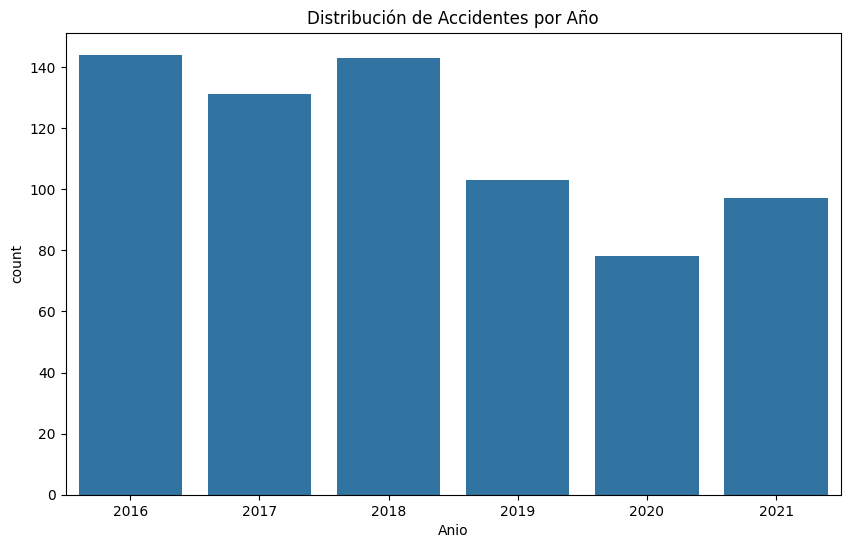

In [51]:
# Distribución de accidentes por año
plt.figure(figsize=(10, 6))
sns.countplot(x='Anio', data=Tiempo)
plt.title('Distribución de Accidentes por Año')
plt.show()

Concluiones:

* Analizamos la distribución de accidentes viales por año y observamos que en 2018 se registró la mayor cantidad de accidentes, mientras que en 2020 se registró la menor cantidad.

* El gráfico muestra que, entre 2016 y 2018, hubo 410 accidentes viales, mientras que entre 2019 y 2021, se registraron 280 accidentes.

* Desde 2019 en adelante, hubo una reducción del 31% en los accidentes viales.

* Podemos concluir que la disminución de accidentes en 2020 se debió a las medidas de confinamiento implementadas.

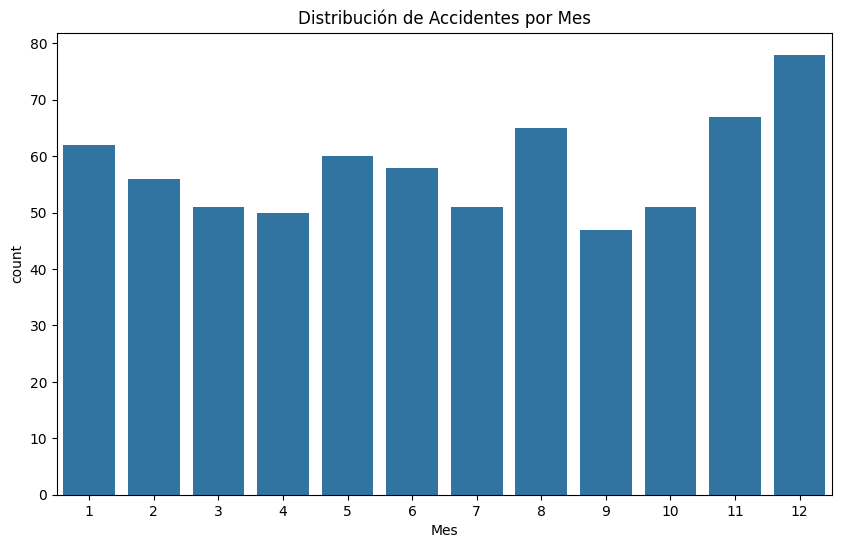

In [52]:
# Distribución de accidentes por mes
plt.figure(figsize=(10, 6))
sns.countplot(x='Mes', data=Tiempo)
plt.title('Distribución de Accidentes por Mes')
plt.show()

Conclusiones

* Diciembre, con festividades como la Navidad y el Fin de Año, es el mes con la mayor cantidad de accidentes viales, seguido de noviembre. Los dos últimos meses del año son los más críticos en términos de siniestros viales.

* Además, se observa un incremento mensual en los accidentes viales a partir de septiembre.

* En los primeros meses del año, desde enero hasta abril, los accidentes viales muestran una disminución mensual.

Estas tendencias pueden estar relacionadas con factores como el aumento del tráfico y las actividades festivas a finales de año, así como una posible reducción de la movilidad en los primeros meses del año.

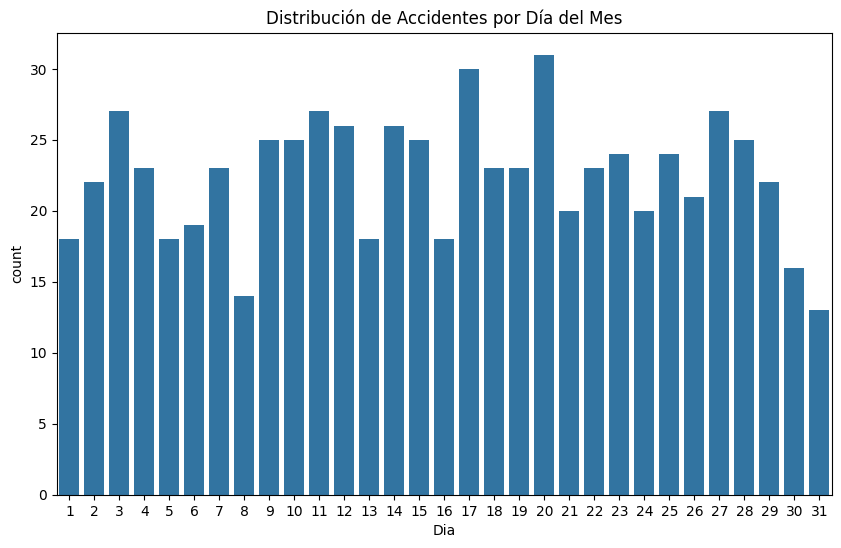

In [53]:
# Distribución de accidentes por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(x='Dia', data=Tiempo)
plt.title('Distribución de Accidentes por Día del Mes')
plt.show()

Conclusiones:

* Según el gráfico, se observa que el día 31 tiene la menor cantidad de accidentes. No obstante, es importante tener en cuenta que no todos los meses tienen 31 días. Por lo tanto, para el análisis, consideraremos el día 8 como el de menor incidencia de accidentes viales.

* Los accidentes viales superan los 30 eventos el día 20 de cada mes, seguido por el día 17.

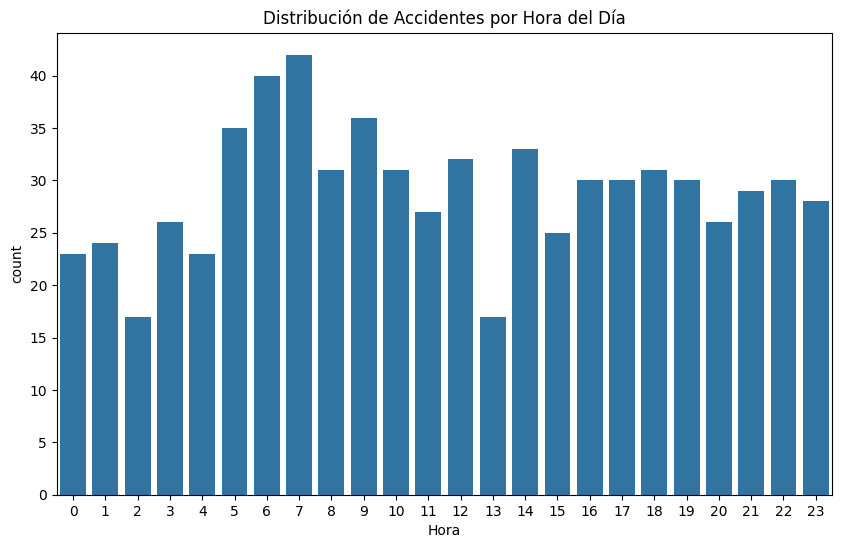

In [54]:
# Distribución de accidentes por hora
plt.figure(figsize=(10, 6))
sns.countplot(x='Hora', data=Tiempo)
plt.title('Distribución de Accidentes por Hora del Día')
plt.show()

Conclusiones:

* A las 7 de la manana supera los 40 eventos de accidentes de trafico, esto se debe que mayor afluencia de vehiculos para llegar a sus destino
* 2 de la manana menor accidentes debido a muy poca ausencia de peatones y vehiculos de transporte
* También se observa una disminución en la cantidad de accidentes viales alrededor de las 13 horas, posiblemente debido a una mayor visibilidad proporcionada por la luz natural a esa hora.
* Entre las 16 horas y 23 horas se oberva que los accidentes de trafico se estabilizan a 30 eventos 

1.4 Análisis bivariado

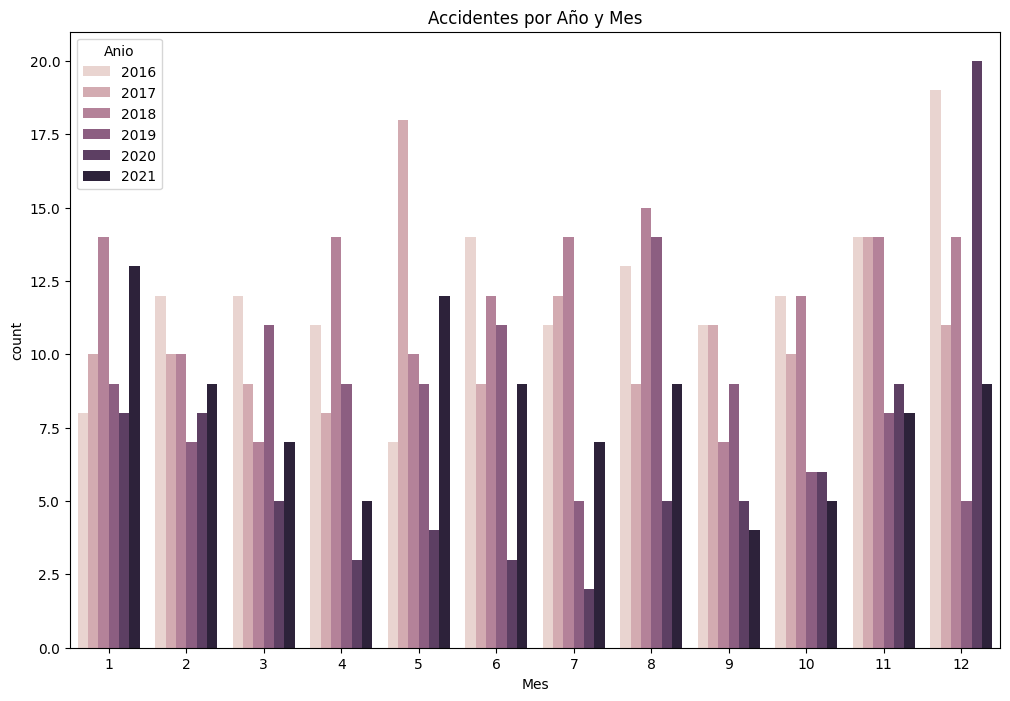

In [55]:
# Accidentes por año y mes
plt.figure(figsize=(12, 8))
sns.countplot(x='Mes', hue='Anio', data=Tiempo)
plt.title('Accidentes por Año y Mes')
plt.show()

Conclusiones:

* Esta gráfica nos muestra la cantidad de accidentes por año y mes. Se observa que en diciembre de 2020 se registró la mayor cantidad de accidentes en un mes del año. Esto puede atribuirse a la reanudación de las actividades durante la pandemia.

* También se observa otro fenómeno relacionado con el confinamiento: en el año 2020, los meses de abril a julio registraron la menor cantidad de accidentes viales.

1.5 Análisis temporal

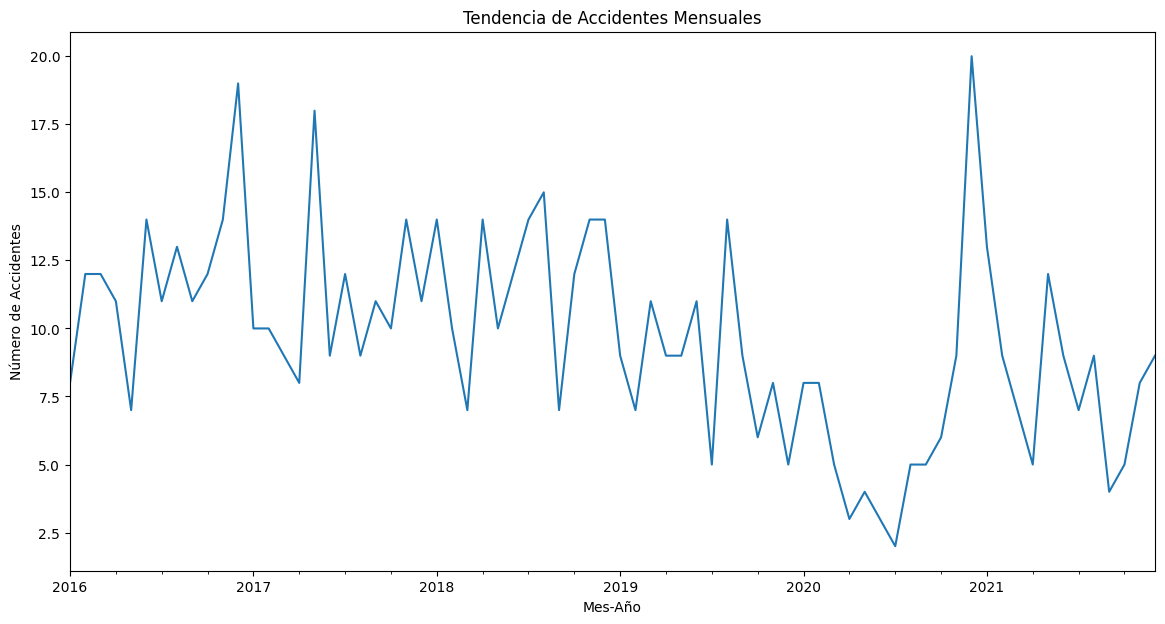

In [56]:
# Agrupar por mes y contar los accidentes
Tiempo['Mes_Ano'] = Tiempo['Fecha'].dt.to_period('M')
monthly_accidents = Tiempo.groupby('Mes_Ano').size()

# Visualizar la tendencia temporal de accidentes
plt.figure(figsize=(14, 7))
monthly_accidents.plot()
plt.title('Tendencia de Accidentes Mensuales')
plt.xlabel('Mes-Año')
plt.ylabel('Número de Accidentes')
plt.show()

Conclusiones:

* Se evidencia en la gráfica que al inicio de cada año hay una disminución en los accidentes viales, mientras que hacia finales de año se observa un aumento en estos incidentes.

* También se aprecia una tendencia general a la disminución gradual de los accidentes viales a lo largo de los años.

* Los meses de confinamiento en el año 2020 marcaron el periodo con la menor cantidad de accidentes viales registrados.

2. EDA del dataframe UBICACION

2.1 INSPECCION INICIAL

In [57]:
# Mostrar las primeras filas del DataFrame
Ubicacion.head()

,Id,Tipo_de_calle,Calle,Altura,Comuna,Altitud,Longitud
0,2016-0001,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-34.687570,-58.475340
1,2016-0002,GRAL PAZ,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,9,-34.669777,-58.508775
2,2016-0003,AVENIDA,ENTRE RIOS AV.,2034,1,-34.631894,-58.390403
3,2016-0004,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-34.680930,-58.465039
4,2016-0005,AVENIDA,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.",1,-34.622466,-58.387183


In [58]:
# Obtener un resumen estadístico
Ubicacion.describe()

,Comuna,Altitud,Longitud
count,696.000000,696.000000,696.000000
mean,7.425287,-34.570074,-58.356889
std,4.387050,1.312763,2.215715
min,0.000000,-34.760893,-58.529942
25%,4.000000,-34.643918,-58.476178
50%,8.000000,-34.622995,-58.444011
75%,11.000000,-34.596136,-58.401626
max,15.000000,0.000000,0.000000


In [59]:
# Obtener información del DataFrame
Ubicacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             696 non-null    object 
 1   Tipo_de_calle  696 non-null    object 
 2   Calle          695 non-null    object 
 3   Altura         654 non-null    object 
 4   Comuna         696 non-null    int64  
 5   Altitud        696 non-null    float64
 6   Longitud       696 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 38.2+ KB


2.2 Limpieza de datos

In [60]:
# Verificar valores nulos
print(Ubicacion.isnull().sum())

# Verificar duplicados
print(Ubicacion.duplicated().sum())

Id                0
Tipo_de_calle     0
Calle             1
Altura           42
Comuna            0
Altitud           0
Longitud          0
dtype: int64
0


2.3 Análisis univariado

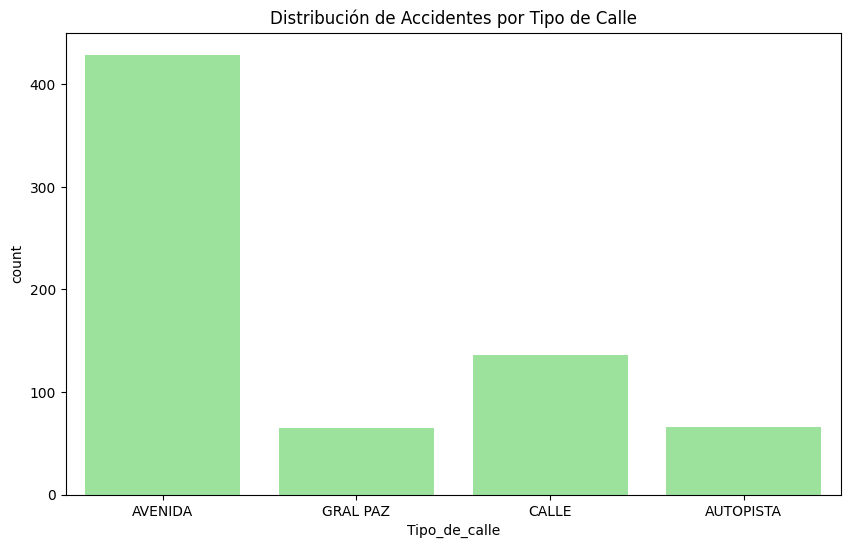

In [61]:
# Distribución de accidentes por tipo de calle
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo_de_calle', data=Ubicacion, color='lightgreen') 
plt.title('Distribución de Accidentes por Tipo de Calle')
plt.show()

Conclusiones:

* Se destaca que la Avenida es el tipo de calle más peligrosa, con un registro de aproximadamente 420 eventos, la cifra más alta entre los diferentes tipos de vías.

* Por otro lado, la Gral. Paz, las Calles y las Autopistas en conjunto suman alrededor de 250 eventos, representando apenas el 60% de los incidentes reportados en Avenidas.

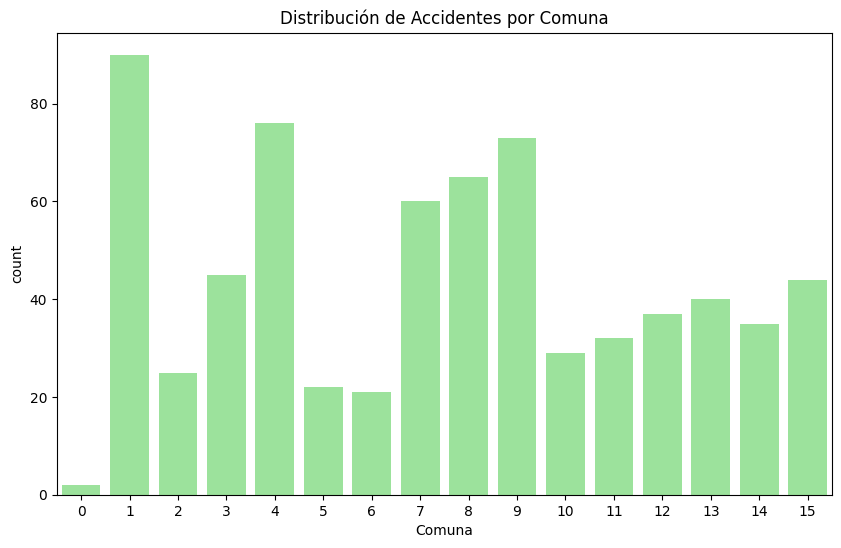

In [62]:
# Distribución de accidentes por comuna
plt.figure(figsize=(10, 6))
sns.countplot(x='Comuna', data=Ubicacion, color='lightgreen')
plt.title('Distribución de Accidentes por Comuna')
plt.show()

Conclusiones:

* La comuna 1 registra la mayor cantidad de accidentes viales, superando los 80 eventos.
  
* Le siguen las comunas 4, 9, 8 y 7, donde sería recomendable implementar algún plan de concientización para la población.

2.4 Análisis bivariado

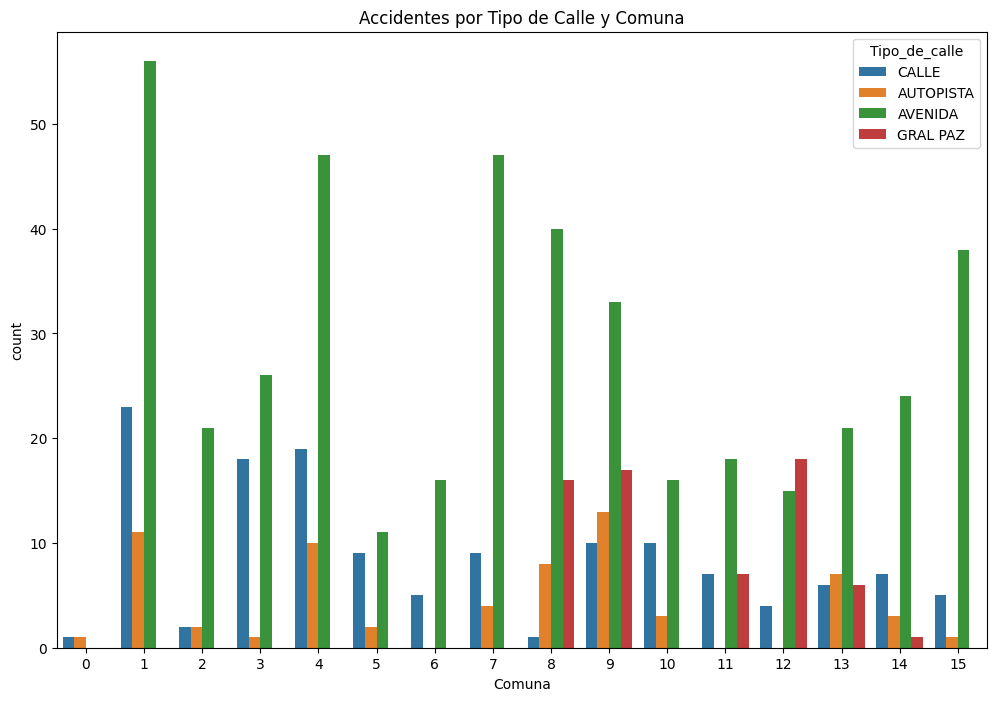

In [63]:
# Accidentes por tipo de calle y comuna
plt.figure(figsize=(12, 8))
sns.countplot(x='Comuna', hue='Tipo_de_calle', data=Ubicacion)
plt.title('Accidentes por Tipo de Calle y Comuna')
plt.show()

Conclusión:

* En todas las comunas, excepto en la comuna 12, las Avenidas son el tipo de calle donde ocurre la mayor cantidad de accidentes viales, seguidas por las Calles.

2.5 Análisis Geográfico

In [64]:
# Crear un mapa base
mapa = folium.Map(location=[Ubicacion['Altitud'].mean(), Ubicacion['Longitud'].mean()], zoom_start=12)

# Añadir puntos al mapa
marker_cluster = MarkerCluster().add_to(mapa)
for idx, row in Ubicacion.iterrows():
    folium.Marker(location=[row['Altitud'], row['Longitud']],
                  popup=f"Tipo de calle: {row['Tipo_de_calle']}<br>Calle: {row['Calle']}<br>Altura: {row['Altura']}<br>Comuna: {row['Comuna']}").add_to(marker_cluster)

# Mostrar el mapa
display(mapa)

Conclusion:

* En el mapa geográfico se puede apreciar la cantidad de accidentes viales ocurridos desde 2016 hasta 2021. Se destaca que la zona este de Buenos Aires registra una mayor cantidad de accidentes viales en comparación con otras áreas.

3. EDA del dataframe ACCIDENTE

3.1 Inspección Inicial

In [65]:
# Mostrar las primeras filas del DataFrame
Accidente.head()

,Id,Rol,Victima,Sexo,Edad,Fecha_de_fallecimiento,Acusado
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,AUTO
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,PASAJEROS
2,2016-0003,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,AUTO
3,2016-0004,CONDUCTOR,MOTO,MASCULINO,18,NaT,SD
4,2016-0005,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,PASAJEROS


In [66]:
# Obtener un resumen estadístico
Accidente.describe()

,Edad,Fecha_de_fallecimiento
count,664.0,649
mean,42.167169,2018-11-23 15:27:27.457627136
min,1.0,2016-01-01 00:00:00
25%,27.0,2017-07-27 00:00:00
50%,37.0,2018-09-21 00:00:00
75%,56.25,2020-03-05 00:00:00
max,95.0,2022-01-03 00:00:00
std,19.788034,NaN


In [67]:
# Obtener información del DataFrame
Accidente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      717 non-null    object        
 1   Rol                     717 non-null    object        
 2   Victima                 717 non-null    object        
 3   Sexo                    717 non-null    object        
 4   Edad                    664 non-null    Int64         
 5   Fecha_de_fallecimiento  649 non-null    datetime64[ns]
 6   Acusado                 717 non-null    object        
dtypes: Int64(1), datetime64[ns](1), object(5)
memory usage: 40.0+ KB


3.2 Limpieza de datos

In [68]:
# Verificar valores nulos
print(Accidente.isnull().sum())

# Verificar duplicados
print(Accidente.duplicated().sum())

Id                         0
Rol                        0
Victima                    0
Sexo                       0
Edad                      53
Fecha_de_fallecimiento    68
Acusado                    0
dtype: int64
0


In [69]:
# Obtener la paleta de colores 'bright'
paleta_bright = sns.color_palette("bright")

# Imprimir los colores en la paleta 'bright'
print(paleta_bright)

[(0.00784313725490196, 0.24313725490196078, 1.0), (1.0, 0.48627450980392156, 0.0), (0.10196078431372549, 0.788235294117647, 0.2196078431372549), (0.9098039215686274, 0.0, 0.043137254901960784), (0.5450980392156862, 0.16862745098039217, 0.8862745098039215), (0.6235294117647059, 0.2823529411764706, 0.0), (0.9450980392156862, 0.2980392156862745, 0.7568627450980392), (0.6392156862745098, 0.6392156862745098, 0.6392156862745098), (1.0, 0.7686274509803922, 0.0), (0.0, 0.8431372549019608, 1.0)]


3.3 Análisis univariado

Text(0.5, 1.0, 'Distribución de Víctimas por Rol')

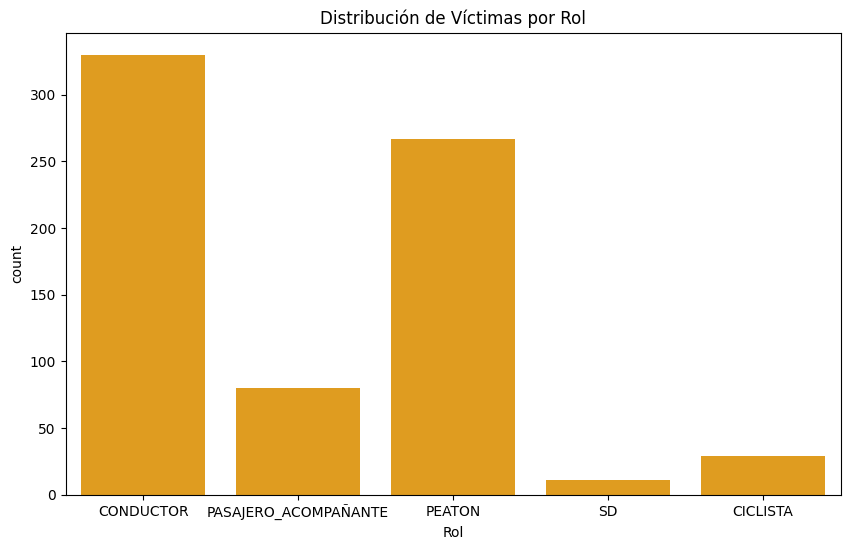

In [70]:
# Distribución de víctimas por rol
plt.figure(figsize=(10, 6))
sns.countplot(x='Rol', data=Accidente, color='orange')
plt.title('Distribución de Víctimas por Rol')

Análisis:

* La mayoría de las víctimas registradas son los conductores, lo que indica que otro conductor es el responsable del accidente.
* En segundo lugar se encuentran los peatones, quienes al no estar protegidos por un vehículo, son más vulnerables especialmente en las avenidas.

Text(0.5, 1.0, 'Distribución de Víctimas por Tipo de Vehículo')

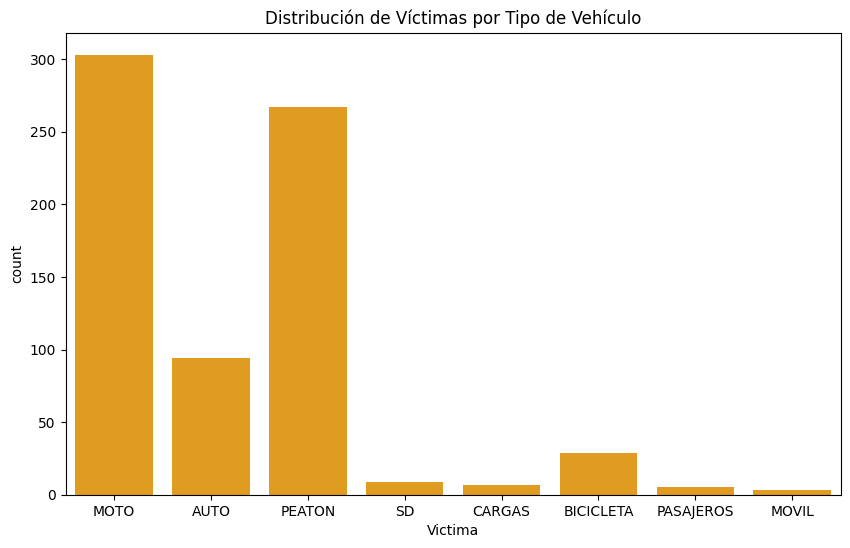

In [71]:
# Distribución de víctimas por tipo de vehículo
plt.figure(figsize=(10, 6))
sns.countplot(x='Victima', data=Accidente, color='orange')
plt.title('Distribución de Víctimas por Tipo de Vehículo')

Análisis:

* El tipo de vehículo con más víctimas es la moto, superando incluso al peatón, quien no cuenta con la protección de un vehículo. Esto indica que las motos son particularmente inseguras debido a su ligereza y alta velocidad.
  
* Por lo tanto, las mayores víctimas son los motos y los peatones, quienes sufren principalmente debido a la falta de protección contra otros vehículos de transporte en las vías de transporte.

Text(0.5, 1.0, 'Distribución de Víctimas por Sexo')

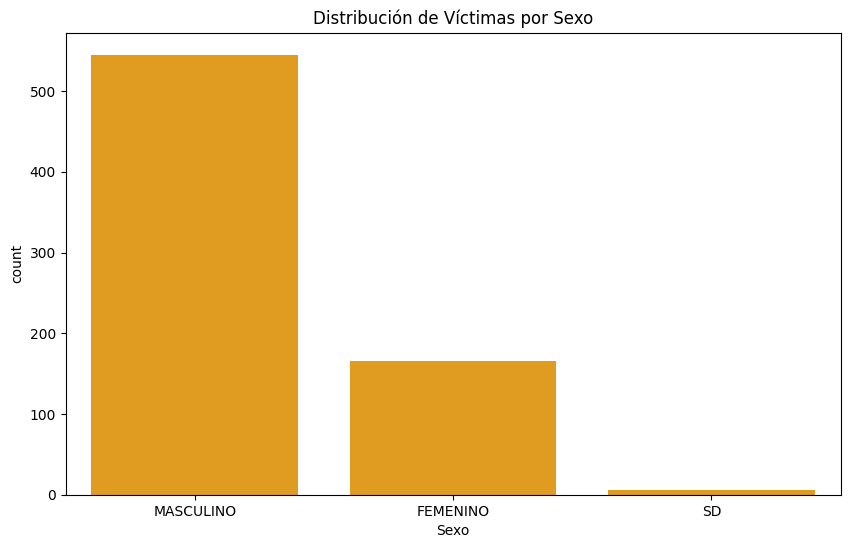

In [72]:
# Distribución de víctimas por sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='Sexo', data=Accidente, color='orange')
plt.title('Distribución de Víctimas por Sexo')

Análisis:

* El sexo masculino presenta aproximadamente tres veces más víctimas en accidentes viales que el sexo femenino, principalmente debido a que la mayoría de los conductores son hombres.

Text(0.5, 1.0, 'Distribución de Edades de Víctimas')

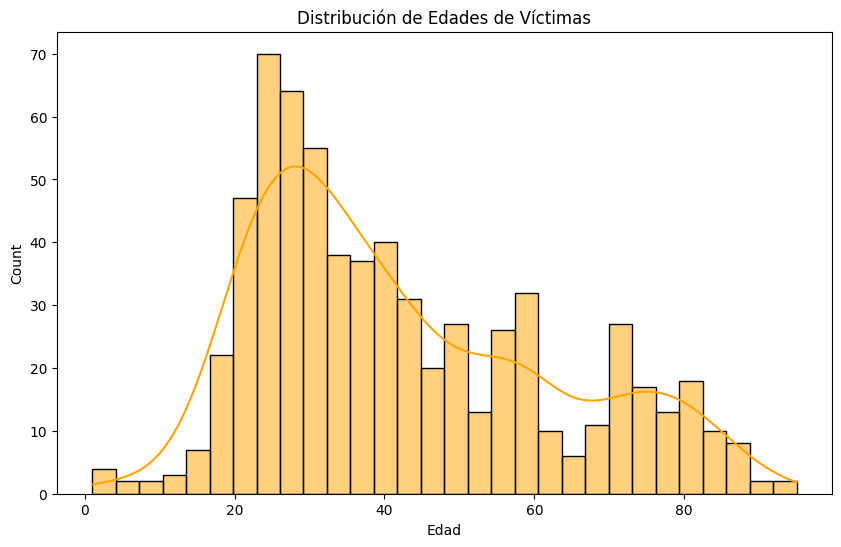

In [73]:
# Distribución de edades de las víctimas
plt.figure(figsize=(10, 6))
sns.histplot(Accidente['Edad'], bins=30, kde=True, color='orange')
plt.title('Distribución de Edades de Víctimas')


Análisis:

* La franja de edades donde se registra la mayor cantidad de víctimas se sitúa entre los 20 y los 30 años. Esto refleja que los accidentes viales afectan principalmente a adultos jóvenes, lo cual puede atribuirse en parte a las actividades que realizan (trabajos, estudios, vida nocturna, etc.).

Text(0.5, 1.0, 'Distribución de Acusados')

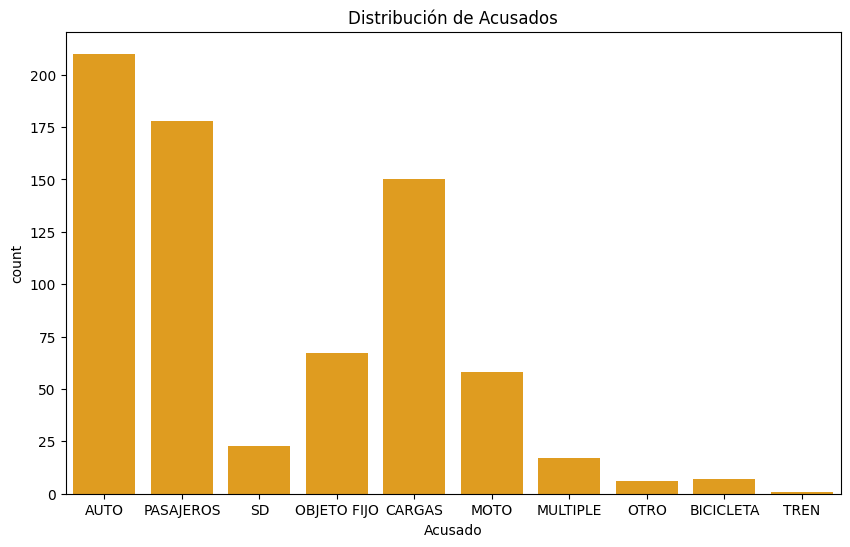

In [74]:
# Distribución de acusados
plt.figure(figsize=(10, 6))
sns.countplot(x='Acusado', data=Accidente, color='orange')
plt.title('Distribución de Acusados')

Análisis:

* El auto es el vehículo que causa más accidentes viales en Buenos Aires, con más de 200 eventos registrados.

3.4 Análisis Bivariado

C:\Users\Paola\AppData\Local\Temp\ipykernel_10428\3635824805.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.countplot(x='Rol', hue='Sexo', data=Accidente, color='orange')


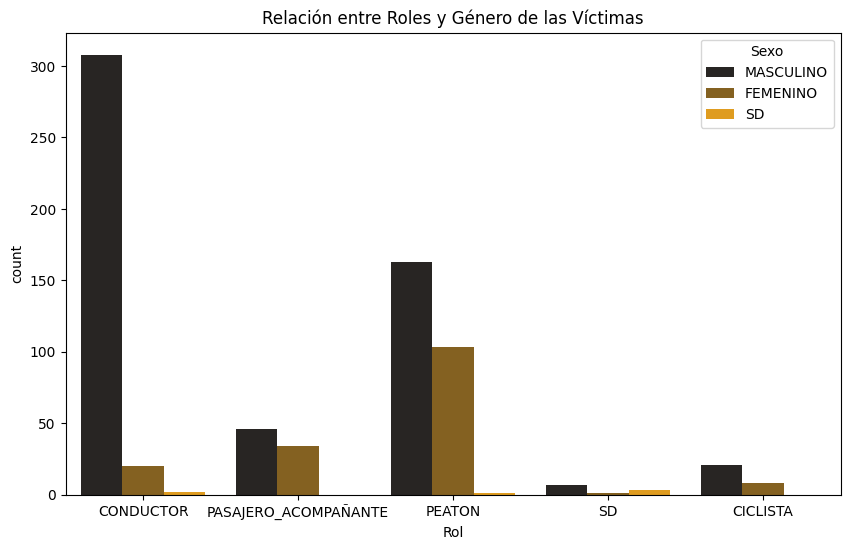

In [75]:
# Relación entre roles y género de las víctimas
plt.figure(figsize=(10, 6))
sns.countplot(x='Rol', hue='Sexo', data=Accidente, color='orange')
plt.title('Relación entre Roles y Género de las Víctimas')
plt.show()

Análisis:

* Las principales víctimas de los accidentes viales son los peatones y los conductores masculinos.
  
* En todos los roles, el sexo masculino es el más afectado por los accidentes viales.